### The process and code for applying the SAGE approach to our SVM model from approach number 2

In [2]:
# imports
import scipy.io as sio
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import svm
import numpy as np
import pickle

In [3]:
#the code for training the model:

# load data
filename = 'svm_model_data/xAI_data_2.mat'
data = sio.loadmat(filename)
X = data["X"]
y = data["y"]

# split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [4]:
# train classifier
#my_model = sklearn.svm.SVC(kernel = 'rbf', probability = True, gamma = 2**3, C = 2**4)
#my_model.fit(X_train, np.squeeze(y_train))

# save model
#savename = './sage/my_model.sav'
#pickle.dump(my_model, open(savename, 'wb'))

In [5]:
# load model and evaluate it
loadname = './sage/my_model.sav'
my_model = pickle.load(open(loadname, 'rb'))

#my_model.score(X_test, y_test)

In [6]:
#import tha sage package
import sage

In [87]:
#fraction the data
X_sage, _, y_sage, _ = train_test_split(X_test, y_test, test_size = 0.999)
y_sage.size

11

In [91]:
#this is the code for working with the sage approach
#every run was saved in a pickle dump and is recovered an plotted below
imputer = sage.DefaultImputer(my_model, np.zeros(4))
estimator = sage.PermutationEstimator(imputer, 'mse')
sage_values = estimator(X_test, y_test)

In [92]:
#the code for dumping all the values
sage_path = './sage/sage_zeros_mse_all.sav'
pickle.dump(sage_values, open(sage_path, 'wb'))

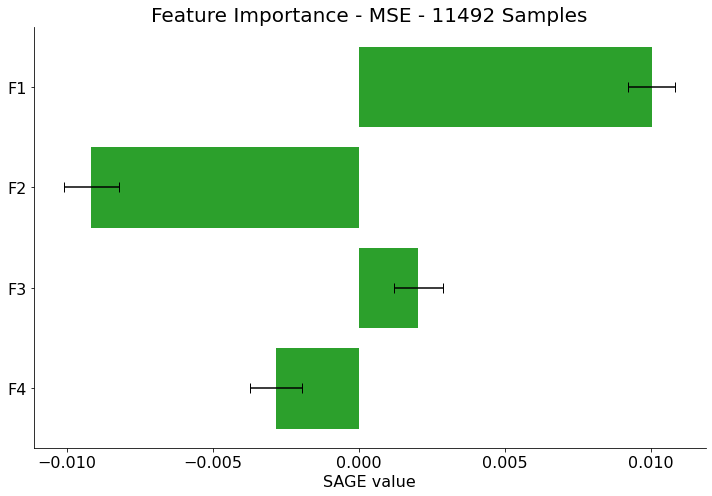

In [93]:
feature_names = ["F1", "F2", "F3", "F4"]
sage_values.plot(feature_names=feature_names, sort_features=False, title='Feature Importance - MSE - 11492 Samples')

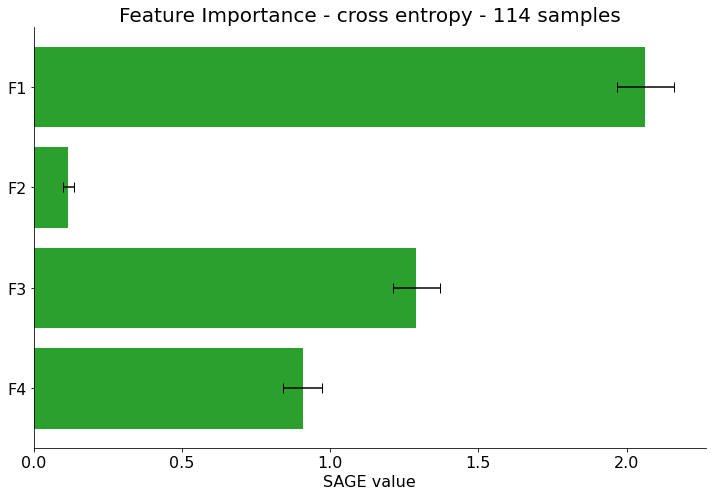

In [94]:
sage_values = pickle.load(open('./sage/sage_zeros_ce_114.sav', 'rb'))
feature_names = ["F1", "F2", "F3", "F4"]
sage_values.plot(feature_names=feature_names, sort_features=False, title='Feature Importance - cross entropy - 114 samples')

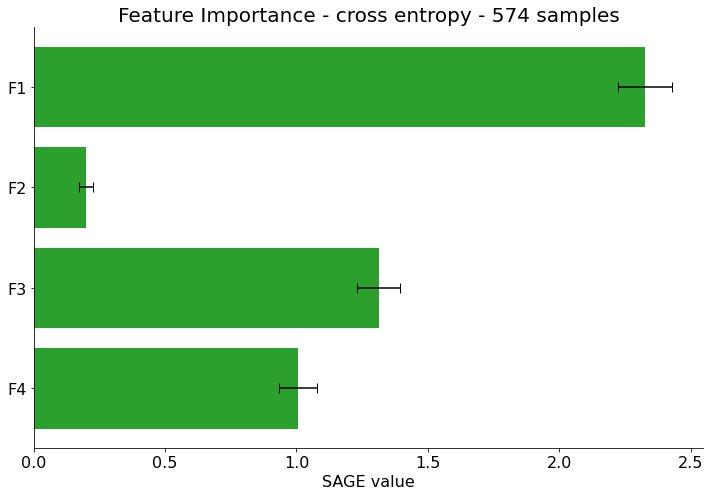

In [96]:
sage_values = pickle.load(open('./sage/sage_zeros_ce_574.sav', 'rb'))
feature_names = ["F1", "F2", "F3", "F4"]
title='Feature Importance - cross entropy - 574 samples'
sage_values.plot(feature_names=feature_names, sort_features=False, title=title)

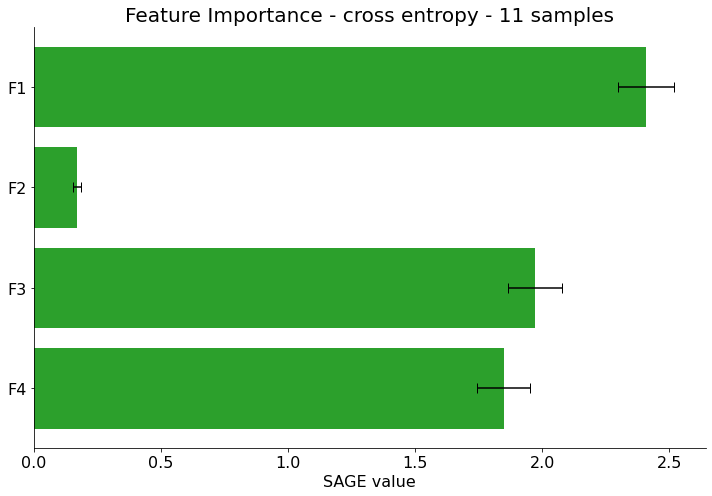

In [97]:
sage_values = pickle.load(open('./sage/sage_zeros_ce_11.sav', 'rb'))
feature_names = ["F1", "F2", "F3", "F4"]
title='Feature Importance - cross entropy - 11 samples'
sage_values.plot(feature_names=feature_names, sort_features=False, title=title)

Calculating model sensitivity (Shapley Effects, not SAGE)


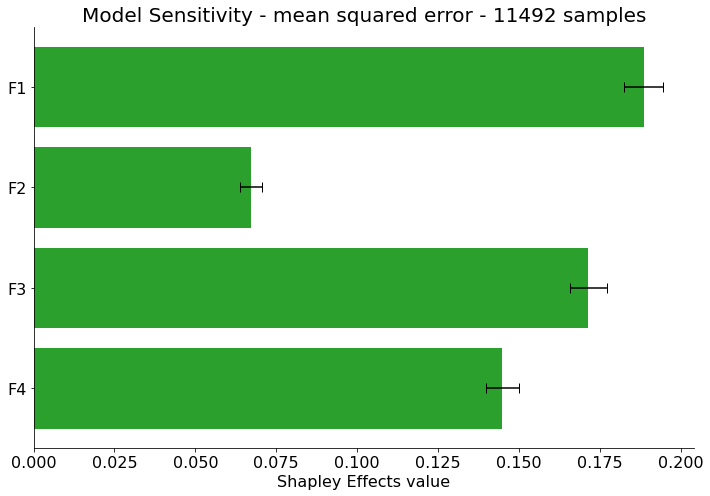

In [98]:
#model sensitivity mse:
imputer = sage.DefaultImputer(my_model, np.zeros(4))
estimator = sage.PermutationEstimator(imputer, 'mse')
sage_values = estimator(X_test)
#the code for dumping all the values
sage_path = './sage/sage_zeros_mse_sens.sav'
pickle.dump(sage_values, open(sage_path, 'wb'))
#plot:
title='Model Sensitivity - mean squared error - 11492 samples'
sage_values.plot(feature_names=feature_names, sort_features=False, title=title)

Calculating model sensitivity (Shapley Effects, not SAGE)


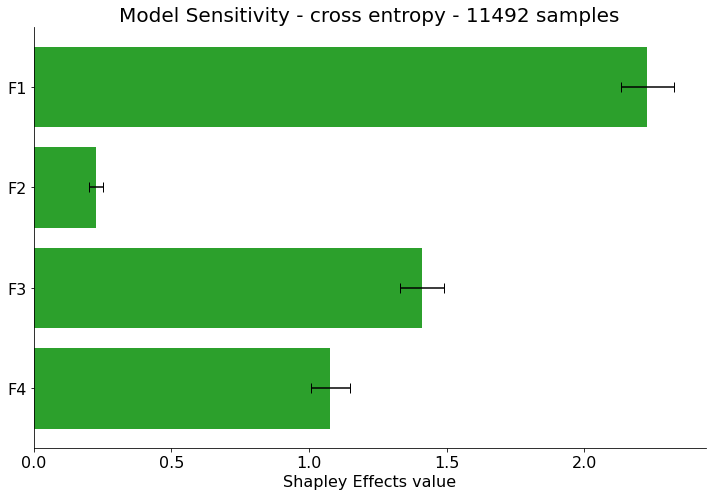

In [99]:
#model sensitivity ce:
imputer = sage.DefaultImputer(my_model, np.zeros(4))
estimator = sage.PermutationEstimator(imputer, 'cross entropy')
sage_values = estimator(X_test)
#the code for dumping all the values
sage_path = './sage/sage_zeros_ce_sens.sav'
pickle.dump(sage_values, open(sage_path, 'wb'))
#plot:
title='Model Sensitivity - cross entropy - 11492 samples'
sage_values.plot(feature_names=feature_names, sort_features=False, title=title)